# Wrapper Qwen2.5-VL-3B

### Load Model

In [1]:
import os
os.environ["HF_HOME"] = "/tmp/huggingface_cache"

In [2]:
!echo $HF_HOME

/tmp/huggingface_cache


In [3]:
from wrapper.local_llm import LocalLLM
model_id="Qwen/Qwen2.5-VL-3B-Instruct"
system_prompt = "Detect all signatures and return their locations and labels in the form of coordinates. "
model=LocalLLM(model_id=model_id, system_prompt=system_prompt,adapter_id="output/signature_model/best_model")

/users/eleves-a/2025/youssef.sidhom/Object_detection_in_documents/venv/lib64/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
model.load()

⚙️ Loading Qwen/Qwen2.5-VL-3B-Instruct (4-bit: False)...


The image processor of type `Qwen2VLImageProcessor` is now loaded as a fast processor by default, even if the model checkpoint was saved with a slow processor. This is a breaking change and may produce slightly different outputs. To continue using the slow processor, instantiate this class with `use_fast=False`. Note that this behavior will be extended to all models in a future release.
/users/eleves-a/2025/youssef.sidhom/Object_detection_in_documents/venv/lib64/python3.9/site-packages/transformers/models/auto/modeling_auto.py:2284: FutureWarning: The class `AutoModelForVision2Seq` is deprecated and will be removed in v5.0. Please use `AutoModelForImageTextToText` instead.
  warnings.warn(
`torch_dtype` is deprecated! Use `dtype` instead!
Loading checkpoint shards: 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]


🔗 Merging Adapter: output/signature_model/best_model
✅ Model Ready.


## inference one image

In [25]:
import json as JSON
image_path="data/images/train_zlu43d00_jpg.rf.168e38dd9efb8db01a1f0b0828b9f1e1_aug_2.jpg"
raw_output=model.predict(image_path, prompt="Detect all signatures in the image and return their locations and labels.")
final_answer=JSON.loads(raw_output[0])
height, width = raw_output[1], raw_output[2]


In [26]:
final_answer

[{'box_2d': [301, 364, 519, 408], 'label': 'signature'}]

In [27]:
ground_t=[[307, 333, 444, 434]]

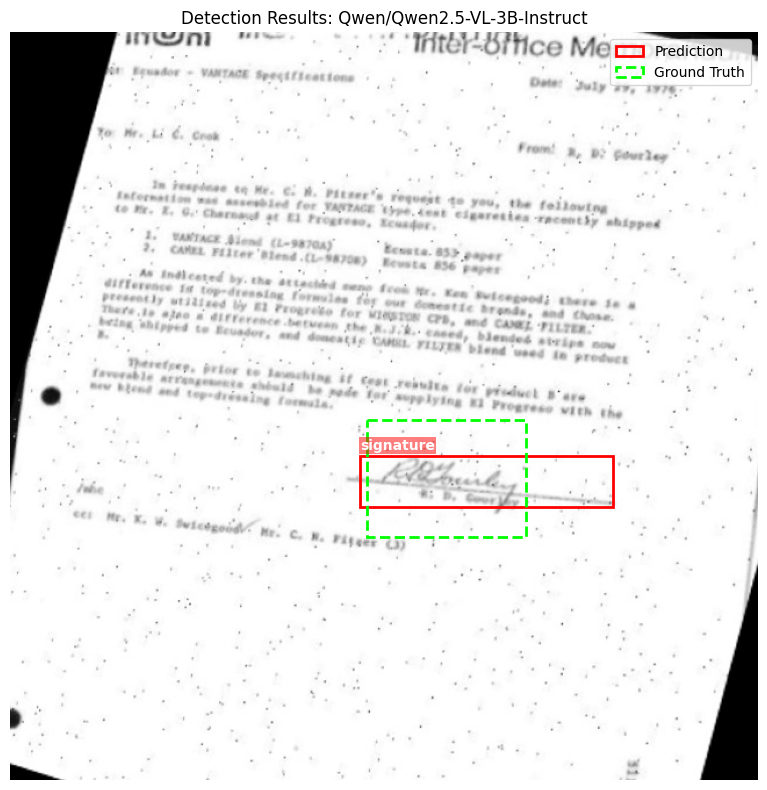

In [28]:
model.plot_bounding_boxes(image_path, final_answer,height,width,ground_truth=ground_t)

## Fine-Tuning 

In [ ]:
model.train(
    train_data="data/train.jsonl",
    val_data="data/valid.jsonl",
    image_dir="data",
    output_dir="output/signature_model",
    
    # --- Performance & Memory Settings ---
    epochs=1,
    batch_size=1,                    # Keep this at 1 to avoid OOM
    gradient_accumulation_steps=8,   # Simulates a batch of 8
    num_workers=4,                   # Keeps the GPU fed with data
    lr=2e-4,                         # Standard for LoRA
)

/users/eleves-a/2025/youssef.sidhom/Object_detection_in_documents/wrapper/local_llm.py:346: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()


🚀 Starting Optimized Training for Qwen/Qwen2.5-VL-3B-Instruct...
🛠️ Applying LoRA (Rank: 16)...
trainable params: 3,686,400 || all params: 3,758,309,376 || trainable%: 0.0981
📦 Loading Datasets...
📂 Loading dataset from: data/train.jsonl
✅ Loaded 5293 raw samples.
📂 Loading dataset from: data/valid.jsonl
✅ Loaded 511 raw samples.
⚡ Using PagedAdamW8bit for memory efficiency.


Epoch 1/1:   0%|          | 0/1324 [00:00<?, ?it/s]/users/eleves-a/2025/youssef.sidhom/Object_detection_in_documents/venv/lib64/python3.9/site-packages/torch/_dynamo/eval_frame.py:632: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/users/eleves-a/2025/youssef.sidhom/Object_detection_in_documents/venv/lib64/python3.9/site-packages/torch/utils/checkpoint.py:87: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...
Epoch 1/1:   0%|          | 3/1324 [00:29<3:37:58,  9.90s/it, loss=16.4179]


KeyboardInterrupt: 